In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pickle

# Step 1: Load and Inspect the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/iris-dataset/1) iris.csv')

In [3]:
print("Dataset Head:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nDataset Shape:\n", df.shape)

Dataset Head:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data Types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Dataset Shape:
 (150, 5)


# Step 2: Data Preprocessing

In [4]:
# Encoding species and splitting into features and target
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()
y = df['species']

In [5]:
# Encode the categorical target (species)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


# Step 3: Train Unpruned Decision Tree

In [7]:
# Train a Decision Tree classifier using default parameters to create a baseline model.
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Step 4: Evaluate Unpruned Model

In [8]:
accuracy_unpruned = accuracy_score(y_test, y_pred)
f1_unpruned = f1_score(y_test, y_pred, average='weighted')  # Weighted for multiclass
print("\nUnpruned Model Evaluation:")
print("Accuracy:", accuracy_unpruned)
print("F1-Score:", f1_unpruned)


Unpruned Model Evaluation:
Accuracy: 1.0
F1-Score: 1.0


# Step 5: Visualize Unpruned Tree

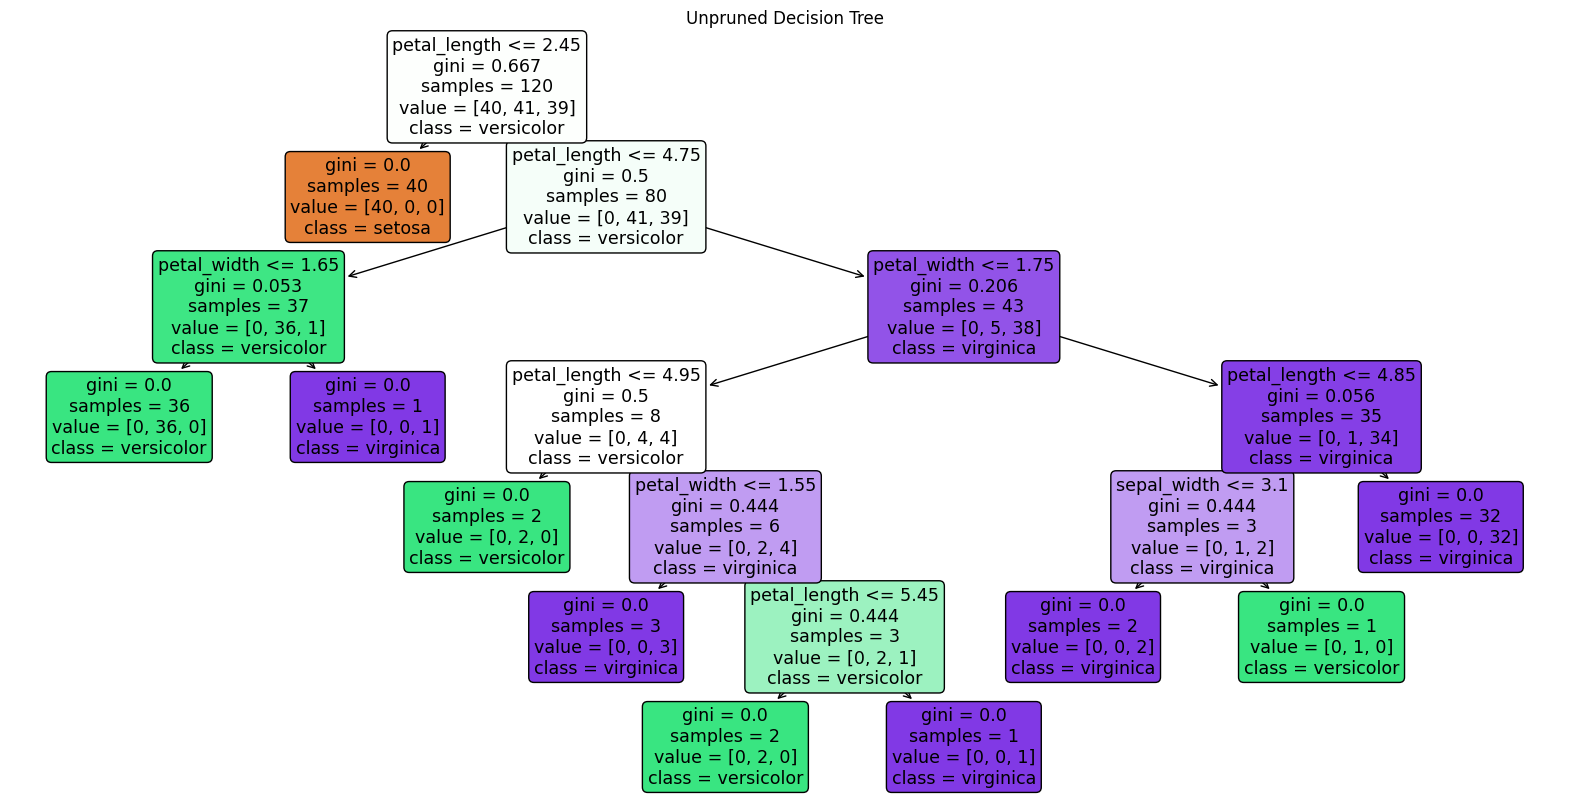

In [9]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
          class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Unpruned Decision Tree")
plt.savefig('/kaggle/working/unpruned_tree.png')
plt.show()

# Step 6: Train Pruned Decision Tree

In [10]:
# Limiting max_depth to 3 to simplify and reduce overfitting
dt_pruned = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_pruned.fit(X_train, y_train)

# Predict on test set with pruned model
y_pred_pruned = dt_pruned.predict(X_test)

# Step 7: Evaluate Pruned Model

In [11]:
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
f1_pruned = f1_score(y_test, y_pred_pruned, average='weighted')
print("\nPruned Model Evaluation (max_depth=2):")
print("Accuracy:", accuracy_pruned)
print("F1-Score:", f1_pruned)


Pruned Model Evaluation (max_depth=2):
Accuracy: 0.9666666666666667
F1-Score: 0.9664109121909632


# Step 8: Visualize Pruned Tree

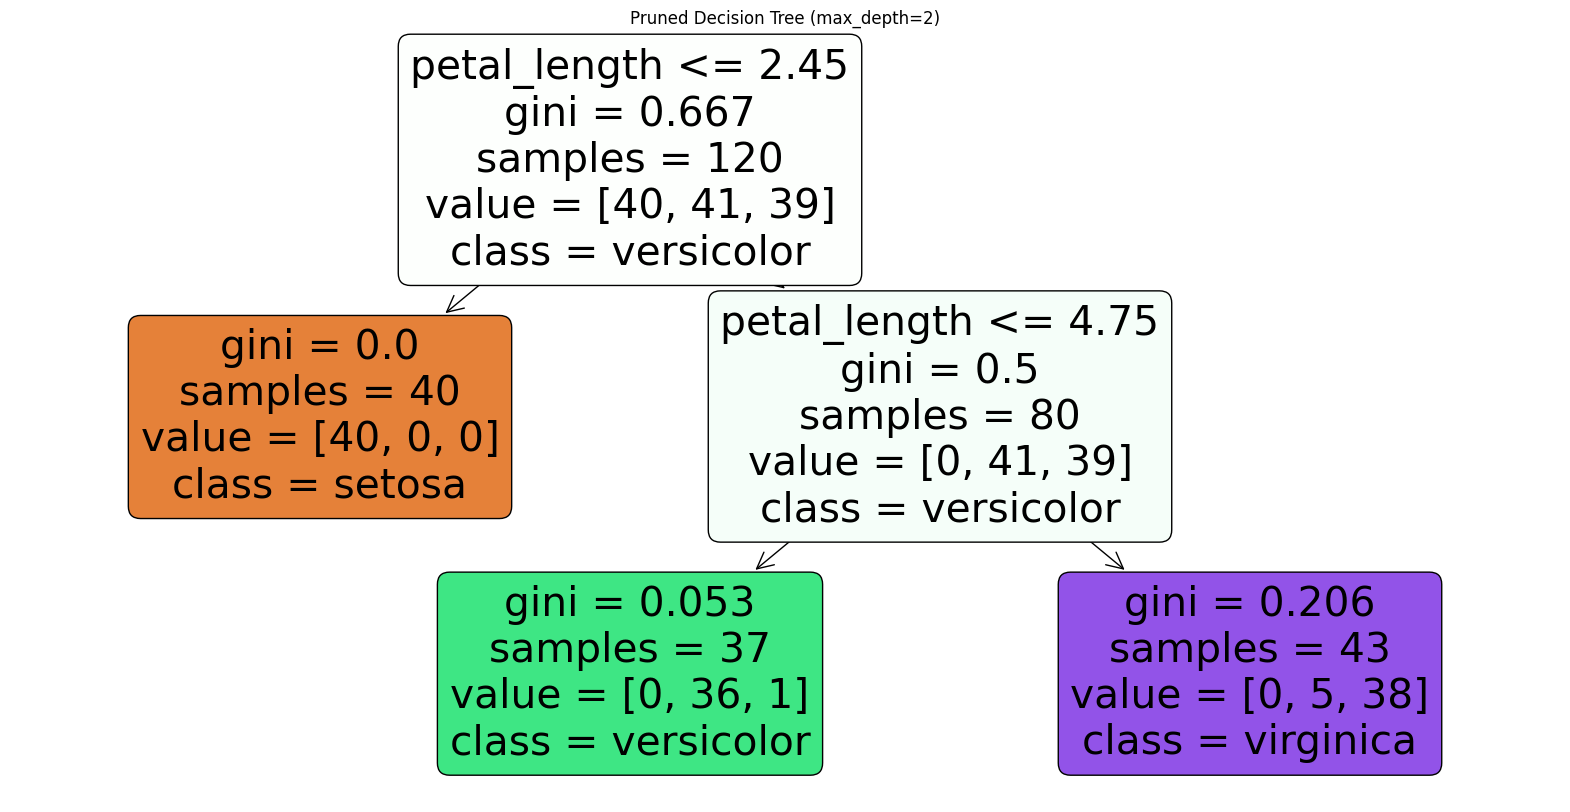

In [12]:
plt.figure(figsize=(20,10))
plot_tree(dt_pruned, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
          class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Pruned Decision Tree (max_depth=2)")
plt.savefig('/kaggle/working/pruned_tree.png')
plt.show()

# Step 9: Save Model and Predictions

In [13]:
with open('/kaggle/working/decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_pruned, f)
pd.DataFrame({'Actual': label_encoder.inverse_transform(y_test), 'Predicted': label_encoder.inverse_transform(y_pred_pruned)}).to_csv('/kaggle/working/predictions_decision_tree.csv', index=False)

print("\nSaved: decision_tree_model.pkl, predictions_decision_tree.csv, unpruned_tree.png, pruned_tree.png")


Saved: decision_tree_model.pkl, predictions_decision_tree.csv, unpruned_tree.png, pruned_tree.png
